In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, integrate
%matplotlib notebook

### Smooth local paths
We will use cubic spirals to generate smooth local paths. Without loss of generality, as $\theta$ smoothly changes from 0 to 1, we impose a condition on the curvature as follows

$\kappa = f'(x) = K(x(1-x))^n $

This ensures curvature vanishes at the beginning and end of the path. Integrating, the yaw changes as
$\theta = \int_0^x f'(x)dx$

With $n = 1$ we get a cubic spiral, $n=2$ we get a quintic spiral and so on. Let us use the sympy package to find the family of spirals

1. Declare $x$ a Symbol

2. You want to find Integral of $f'(x)$

3. You can choose $K$ so that all coefficients are integers

Verify if $\theta(0) = 0$ and $\theta(1) = 1$

In [2]:
K = 6 #choose for cubic/quintic
n = 1 #choose for cubic/ quintic
x = Symbol('x') #declare as Symbol
print(integrate(K*(x*(1-x)), x)) # complete the expression
K = 30
n = 2
print(integrate(K*(x*(1-x))**n, x))

-2*x**3 + 3*x**2
6*x**5 - 15*x**4 + 10*x**3


In [3]:
#write function to compute a cubic spiral
#input/ output can be any theta
def cubic_spiral(theta_i, theta_f, n=10):
    x = np.linspace(0, 1, num=n)
    theta = (-2*x**3 + 3*x**2)*(theta_f - theta_i) + theta_i
    return theta 

def quintic_spiral(theta_i, theta_f, n=10):
    x = np.linspace(0, 1, num=n)
    theta = (6*x**5 - 15*x**4 + 10*x**3)*(theta_f - theta_i) + theta_i    
    return theta

In [4]:
cubic_spiral(np.pi/4,np.pi/2)

array([0.78539816, 0.81233226, 0.88451563, 0.98901991, 1.11291674,
       1.24327775, 1.36717458, 1.47167886, 1.54386223, 1.57079633])

### Plotting
Plot cubic, quintic spirals along with how $\theta$ will change when moving in a circular arc. Remember circular arc is when  $\omega $ is constant


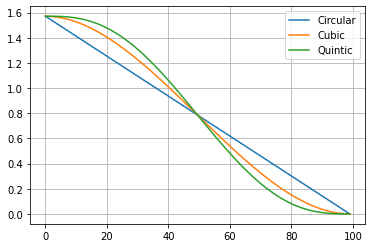

In [5]:
plt.figure()
num_pts = 100
theta_i = np.pi/2
theta_f = 0
plt.plot(theta_i + np.linspace(0,1,num=num_pts)*(theta_f-theta_i), label='Circular')
plt.plot(cubic_spiral(theta_i, theta_f, num_pts), label='Cubic')
plt.plot(quintic_spiral(theta_i, theta_f,num_pts),label='Quintic')
plt.grid()
plt.legend()

## Trajectory

Using the spirals, convert them to trajectories $\{(x_i,y_i,\theta_i)\}$. Remember the unicycle model 

$dx = v\cos \theta dt$

$dy = v\sin \theta dt$

$\theta$ is given by the spiral functions you just wrote. Use cumsum() in numpy to calculate {(x_i,y_i)}

What happens when you change $v$?

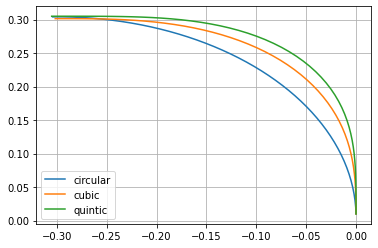

In [6]:
v = 1
dt = 0.01
num_pts = 50
theta_i = np.pi/2
theta_f = np.pi

theta_circular = theta_i + np.linspace(0,1,num=num_pts-2)*(theta_f-theta_i)
theta_cubic = cubic_spiral(theta_i,theta_f,num_pts)
theta_quintic = quintic_spiral(theta_i,theta_f,num_pts+2)

# circular trajectory for turn
x_circular = np.cumsum(v*np.cos(theta_circular)*dt)
y_circular = np.cumsum(v*np.sin(theta_circular)*dt)

# cubic trajectory for turn
x_cubic = np.cumsum(v*np.cos(theta_cubic)*dt)
y_cubic = np.cumsum(v*np.sin(theta_cubic)*dt)

# quintic trajectory for turn
x_quintic = np.cumsum(v*np.cos(theta_quintic)*dt)
y_quintic = np.cumsum(v*np.sin(theta_quintic)*dt)

# plot trajectories for circular/ cubic/ quintic
plt.figure()
plt.plot(x_circular,y_circular,label='circular')
plt.plot(x_cubic,y_cubic,label="cubic")
plt.plot(x_quintic,y_quintic,label='quintic')
plt.grid()
plt.legend()

x: 0.9910427206216612 y: 0.9910427206216612


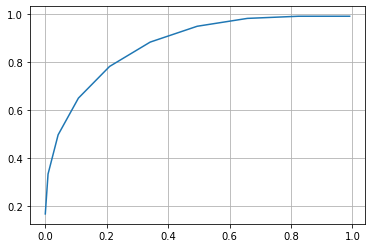

In [7]:
v = 10/6
dt = .1
q = cubic_spiral(np.pi/2,0)
x = np.cumsum(v*np.cos(q)*dt)
y = np.cumsum(v*np.sin(q)*dt)
plt.figure()
plt.plot(x,y)
plt.grid()
print(f"x: {x[-1]} y: {y[-1]}")

## Symmetric poses

We have been doing only examples with $|\theta_i - \theta_f| = \pi/2$. 

What about other orientation changes? Given below is an array of terminal angles (they are in degrees!). Start from 0 deg and plot the family of trajectories

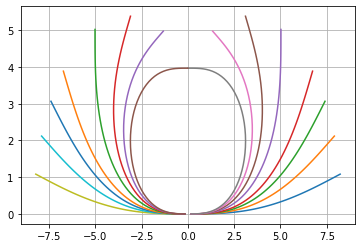

In [8]:
dt = 0.1
thetas = [15, 30, 45, 60, 90, 120, 150, 180] #convert to radians
plt.figure()
for tf in thetas:
    t = cubic_spiral(0, np.deg2rad(tf),50)
    x = np.cumsum(v*np.cos(t)*dt)
    y = np.cumsum(v*np.sin(t)*dt)
    plt.plot(x, y)

# On the same plot, move from 180 to 180 - theta
thetas = 180 - np.array([15, 30, 45, 60, 90, 120, 150, 180])
for tf in thetas:
  t = cubic_spiral(np.pi,np.deg2rad(tf),50)
  x = np.cumsum(v*np.cos(t)*dt)
  y = np.cumsum(v*np.sin(t)*dt)
  plt.plot(x, y)

plt.grid()

Modify your code to print the following for the positive terminal angles $\{\theta_f\}$
1. Final x, y position in corresponding trajectory: $x_f, y_f$ 
2. $\frac{y_f}{x_f}$ and $\tan \frac{\theta_f}{2}$

What do you notice? 
What happens when $v$ is doubled?

In [9]:
dt = 0.1
thetas = [1,15, 30, 45, 60, 90, 120, 150, 180] 
v = 10/6
for tf in thetas:
    t = cubic_spiral(0, np.deg2rad(tf),50)
    x = np.cumsum(v*np.cos(t)*dt)
    y = np.cumsum(v*np.sin(t)*dt)
    print(f"tf:{tf} xf:{x[-1] :0.3f} yf:{y[-1] :0.3f} yf/xf: {y[-1]/x[-1] :0.3f} tan(theta_f/2): {np.tan(np.deg2rad(tf)/2) :0.3f}")

tf:1 xf:8.333 yf:0.073 yf/xf: 0.009 tan(theta_f/2): 0.009
tf:15 xf:8.227 yf:1.083 yf/xf: 0.132 tan(theta_f/2): 0.132
tf:30 xf:7.913 yf:2.120 yf/xf: 0.268 tan(theta_f/2): 0.268
tf:45 xf:7.407 yf:3.068 yf/xf: 0.414 tan(theta_f/2): 0.414
tf:60 xf:6.735 yf:3.888 yf/xf: 0.577 tan(theta_f/2): 0.577
tf:90 xf:5.025 yf:5.025 yf/xf: 1.000 tan(theta_f/2): 1.000
tf:120 xf:3.109 yf:5.385 yf/xf: 1.732 tan(theta_f/2): 1.732
tf:150 xf:1.334 yf:4.979 yf/xf: 3.732 tan(theta_f/2): 3.732
tf:180 xf:0.000 yf:3.970 yf/xf: 35755160563448472.000 tan(theta_f/2): 16331239353195370.000


These are called *symmetric poses*. With this spiral-fitting approach, only symmetric poses can be reached. 

In order to move between any 2 arbitrary poses, you will have to find an intermediate pose that is pair-wise symmetric to the start and the end pose. 

What should be the intermediate pose? There are infinite possibilities. We would have to formulate it as an optimization problem. As they say, that has to be left for another time!

In [10]:
print(np.linspace(0,90,91))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90.]


In [ ]:
for k in np.linspace(0,90,91*100):
  thetas = np.linspace(k,k+90,91*100)
  for tf in thetas:
    t = cubic_spiral(np.deg2rad(k),np.deg2rad(tf),50)
    x = np.cumsum(v*np.cos(t)*dt)
    y = np.cumsum(v*np.sin(t)*dt)
    try:
      if (y[-1]/x[-1] == np.tan(np.deg2rad(tf)/2)):
        print(f"Found at {k,tf}")
    except ZeroDivisionError:
      if np.inf == np.tan(np.deg2rad(tf)/2):
        print(f"Found at {k,tf}")
  #print(f"tf:{np.rad2deg(t[-1])} xf:{x[-1] :0.3f} yf:{y[-1] :0.3f} yf/xf: {y[-1]/x[-1] :0.3f} tan(theta_f/2): {np.tan(np.deg2rad(tf)/2) :0.3f}")
  """ There is no combination of initial theta and final theta for which cubic_spiral
   could generate the condition for symmetric poses except for the combination
   (0.0, theta)"""

Found at (0.0, 0.0)
Found at (0.0, 0.029673590504451036)
Found at (0.0, 0.06923837784371908)
Found at (0.0, 0.08902077151335311)
Found at (0.0, 0.13847675568743817)
Found at (0.0, 0.1582591493570722)
Found at (0.0, 0.21760633036597427)
Found at (0.0, 0.2472799208704253)
Found at (0.0, 0.27695351137487634)
Found at (0.0, 0.29673590504451036)
Found at (0.0, 0.3066271018793274)
Found at (0.0, 0.35608308605341243)
Found at (0.0, 0.3956478733926805)
Found at (0.0, 0.45499505440158255)
Found at (0.0, 0.4648862512363996)
Found at (0.0, 0.4747774480712166)
Found at (0.0, 0.4945598417408506)
Found at (0.0, 0.5044510385756676)
Found at (0.0, 0.5143422354104846)
Found at (0.0, 0.5242334322453016)
Found at (0.0, 0.6330365974282888)
Found at (0.0, 0.6429277942631058)
Found at (0.0, 0.6726013847675568)
Found at (0.0, 0.7220573689416419)
Found at (0.0, 0.7319485657764588)
Found at (0.0, 0.7418397626112759)
Found at (0.0, 0.9396636993076162)
Found at (0.0, 0.9792284866468842)
Found at (0.0, 1.04846686